In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt


In [2]:
df = pd.read_pickle('./data_final.pkl') #importing cleaned data from the other file

In [3]:
station_flow_annual = df.groupby(by = 'Station')['Net_Flow'].sum()
station_flow_annual.sort_values(ascending = False,inplace = True)

stations_name = station_flow_annual.index[:10].tolist()
stations_size = station_flow_annual[:10]

In [4]:
df_location = pd.read_csv('~/Documents/Github/Strategic_placements_of_resources/Strategic_placements_of_resources/data/external/StationEntrances.csv')

In [5]:
df_location.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,...,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775149,-73.912074
1,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.774810,-73.912151
2,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775025,-73.911891
3,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.774938,-73.912337
4,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SW,40.770313,-73.917978


In [6]:
location = pd.DataFrame(
                    df_location.groupby(by = 'Station_Name')[['Station_Latitude','Station_Longitude']].mean()).reset_index()

In [7]:
location.head()

,Station_Name,Station_Latitude,Station_Longitude
0,103rd St,40.781165,-73.929092
1,104th St-102nd St,40.695178,-73.844330
2,104th St-Oxford Av,40.681711,-73.837683
3,110th St,40.795020,-73.944250
4,110th St-Central Park North,40.799075,-73.951822


In [8]:
data = {'Station_Flow':stations_size}
stations = pd.DataFrame(data = data).reset_index()

In [9]:
station_dict = {'TIMES SQ-42 ST':'Times Square-42nd St','23 ST':'23rd St','GRD CNTRL-42 ST':'Grand Central-42nd St',
               '14 ST-UNION SQ':'14th St-Union Square','FULTON ST':'Fulton St','86 ST':'86th St','125 ST':'125th St',
               "42 ST-PORT AUTH":"42th St-Port Authority",'34 ST-PENN STA':'34th St-Penn','34 ST-HERALD SQ':'34th St-Herald Sq'}

In [10]:
stations.Station.replace(station_dict,inplace = True)

In [11]:
Station_loca = stations.merge(location,how='left',left_on = 'Station',right_on = 'Station_Name')

In [12]:
Station_loca.loc[Station_loca['Station'] == '34th St-Penn', 'Station_Latitude'] = 1

In [19]:
station_to_fill = ['34th St-Penn','34th St-Herald Sq','42th St-Port Authority','86th St']
lat_2fill = [40.752342 , 40.749936 , 40.757965,40.778025]
lon_2fill = [-73.9932 , -73.988050,-73.991302,-73.951095]

for i in range(len(station_to_fill)):
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Latitude'] = lat_2fill[i]
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Longitude'] = lon_2fill[i]

In [22]:
columns_to_keep = [ 'Station','Station_Flow','Station_Latitude','Station_Longitude']
Stations = pd.DataFrame(Station_loca[columns_to_keep])

Stations.Station_Flow = Stations.Station_Flow/1000000*200

In [15]:
Stations

,Station,Station_Flow,Station_Latitude,Station_Longitude
0,34th St-Penn,9597.6071,40.752342,-73.993200
1,Grand Central-42nd St,8278.0697,40.751738,-73.976758
2,34th St-Herald Sq,7237.5991,40.749936,-73.988050
3,23rd St,5999.3720,40.742838,-73.992445
4,Times Square-42nd St,5918.6307,40.754672,-73.986754
5,14th St-Union Square,5882.0101,40.734673,-73.989951
6,42th St-Port Authority,5702.2504,40.757965,-73.991302
7,Fulton St,5253.3868,40.707411,-74.004122
8,86th St,4941.5366,40.753149,-73.974264
9,125th St,4389.6971,40.809510,-73.948289


In [16]:
text = list(Stations.Station)

counter = 1
for txt in text:
    txt = str(counter)+txt
    counter += 1

In [17]:
Bbox = (-74.0152,   -73.9700,      
         40.7324, 40.7675)
ruh_m = plt.imread('./NYCmap2.png')

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not ['red', 'orangeorangeorangeorangeorangeorangeorangeorangeorange'].

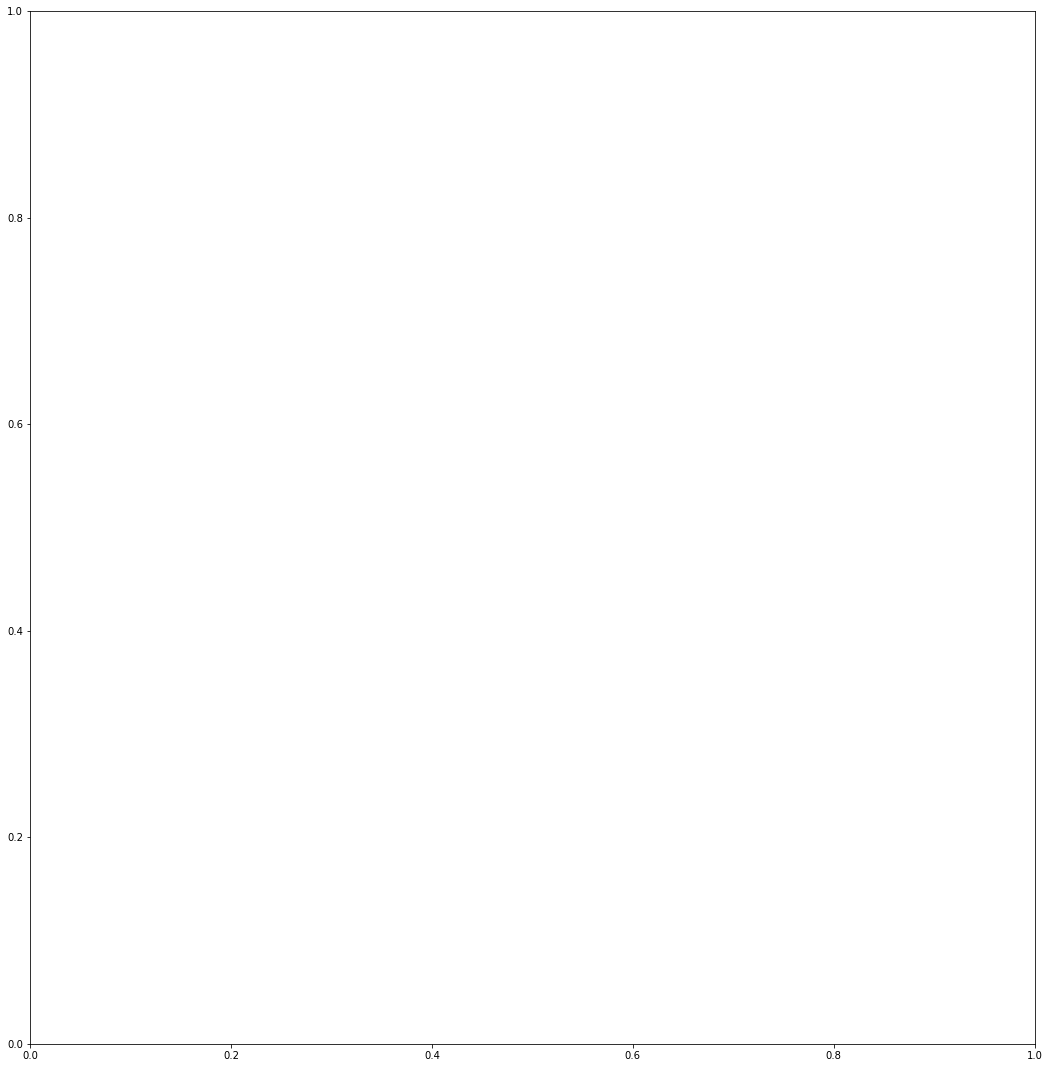

In [27]:
fig, ax = plt.subplots(figsize = (18,19))

ax.scatter(y = Stations.Station_Latitude,x = Stations.Station_Longitude, zorder=1, 
           c = ['red','orange'*9],alpha= 0.2, s=Stations.Station_Flow)
#ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])
ax.set_frame_on(False)
ax.set_yticklabels("")
ax.set_xticklabels("")
ax.tick_params(axis = u'both', which=u'both',length=0)
ax.imshow(ruh_m, zorder=0, extent = Bbox, aspect= 'auto')

for i, txt in enumerate(text):
    ax.annotate(txt, (Stations.Station_Longitude[i], Stations.Station_Latitude[i]),fontsize = 28)

fig.savefig('mapgraph.png')